import libraries

In [2]:

import numpy as np
import seaborn as sns
import pandas as pd

load dataset

In [3]:
df = pd.read_csv('emotion_dataset.csv')
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


count the number of occurences of each column

In [4]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

using seaborn library count the number of occurences of each value in emotion column

<Axes: xlabel='Emotion', ylabel='count'>

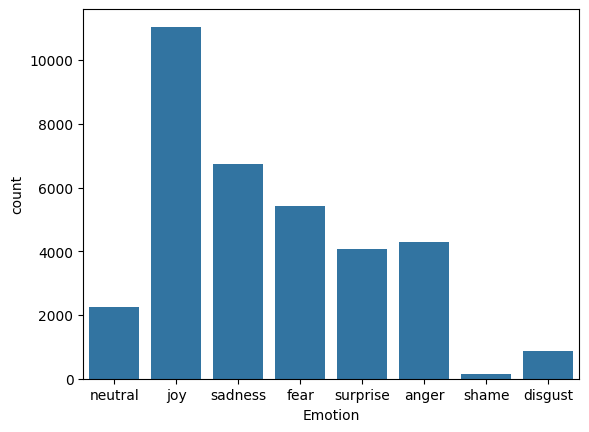

In [5]:
sns.countplot(x = 'Emotion',data=df)

data preprocessing

In [6]:
import neattext.functions as nfx

remove the user handles

In [7]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [8]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

remove stopWords

In [9]:
df['Clean_Text'] = df['Clean_Text'].astype(str).apply(nfx.remove_stopwords)


In [10]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


split data into input variables and target variables

In [11]:
x = df['Clean_Text']
y = df['Emotion']

split data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

training the model

import - 
pipeline for training the model faster and automated
countVectorizer for transform a given text into vector on the basis of the frequency count
algorithms - 
Support Vector Machine (SVM)
Random Forest classifier
Logistic Regression

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


create pipeline and use logistic regression

In [14]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/Users/shamimkhan/Desktop/ML/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6197547422877946

use support vector machine (SVM) 

In [15]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel='rbf',C=10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6218624257520597

use random forest classifier

In [16]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5667752442996743

save the logistic regression model with pickle or joblib library

In [17]:
import joblib
pipeline_file = open("emotion_detection_2.pkl",'wb')
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

lets deploy the model now